<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/Amazon_Sales_Analysis/blob/main/Amazon_Sale_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aim of the Project**

* In this project, we are going to analyse the order data from Amazon dataset which contains all related data features as column values.
* We have imported all the necessary libraries and processed the data to make it conducive for analysis then performed Exploratory Data Analysis (EDA) to study the realtionship between the variables and to analyse the impact of each feature to the result.
* Utilize the analysis  to get understanding on insights to plan the actions to improve the business.

In [1]:
# import all the necessary libraries to process the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Connecting the data here to move forward
df = pd.read_csv('/content/Amazon Sale Report.csv')

In [12]:
#Checking the shape of dataset
df.shape

(128976, 21)

In [13]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [15]:
# Drooping the columns with more Null values which doesn't have effects on result
df.drop(['New','PendingS'],axis=1,inplace=True)

In [16]:
#rechecking after dropping them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [17]:
#Checking the count of null values in the dataset
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [18]:
#drop the Null values from data
df.dropna(inplace=True)

In [19]:
#Rechecking the shape after dropping null values and columns
df.shape

(37514, 19)

In [20]:
#Showing Columns list
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [21]:
#Have to change the datatype of ship-postal-code
df['ship-postal-code'].dtype

dtype('float64')

In [22]:
#Change the datatype of above column
df['ship-postal-code']=df['ship-postal-code'].astype('int')
df['ship-postal-code'].dtype

dtype('int64')

In [23]:
#Change the datatype of Date column
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-23-2fdc55360ab0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [24]:
#Rechecking the datatype after changing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [25]:
#Rename Column for better understanding
df.rename(columns={'Qty':'Quantity'},inplace=True)

#Rechecking the name
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [26]:
#Expose the metrics of the numeric columns
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [27]:
#Expose the capabilities along with object columns
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


#**Exploratory Data Analysis**

###Creating the Charts using all the features to see the relations between them to make better analysis

<Axes: xlabel='Size', ylabel='count'>

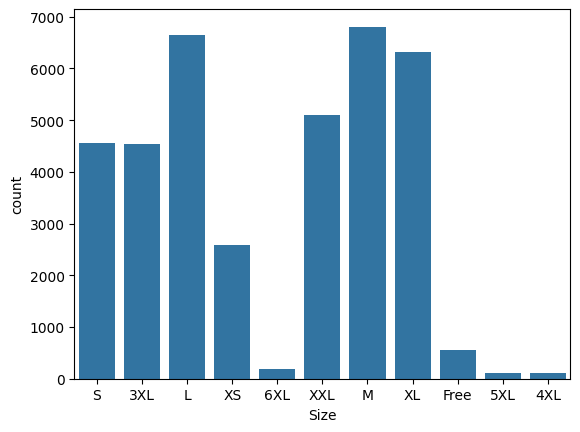

In [28]:
#Charts on size of clothes
sns.countplot(x='Size',data=df)

* From the above chart we can clearly see the most used size in clothing are M, L, and XL.

* There also Size 'M" will the highest in sales among others.

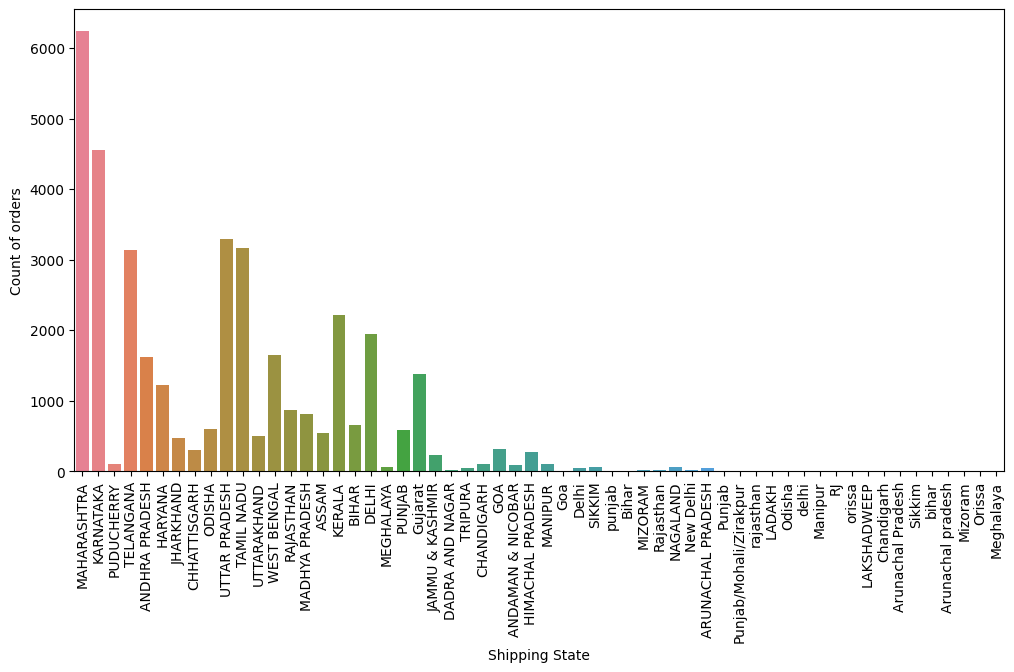

In [29]:
#Plot the chart of count the orders by state
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='ship-state',hue='ship-state')
plt.xlabel('Shipping State')
plt.ylabel('Count of orders')
plt.xticks(rotation=90)
plt.show()

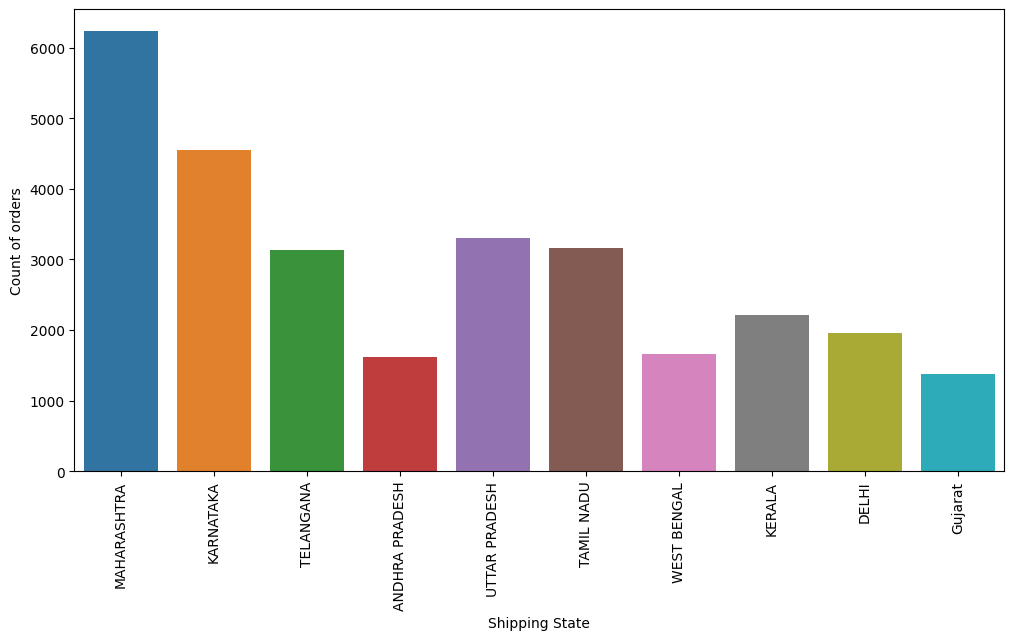

In [30]:
#Top 10 states by count
top_10 = df['ship-state'].value_counts().head(10)
#Plot the chart of Top 10 state on count the orders
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10.index)], x='ship-state',hue='ship-state')
plt.xlabel('Shipping State')
plt.ylabel('Count of orders')
plt.xticks(rotation=90)
plt.show()

* Above chart shows the count of orders shipped to the different states from the sales data and from the analysis some of states are the major contributors and nearly half of them are merely zero orders.
* We can see that Maharashtra been the major contributor followed by karnataka and uttar pradesh.

In [31]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

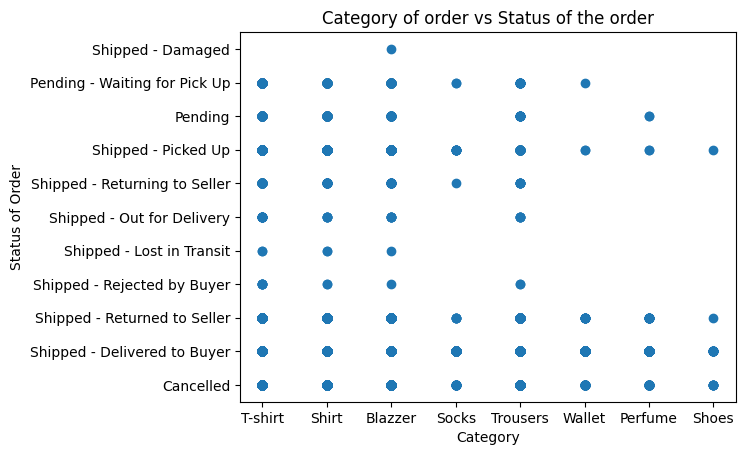

In [32]:
#Create a scatter plot between two columns to see the relation
plt.scatter(df['Category'],df['Status'])
plt.xlabel('Category')
plt.ylabel('Status of Order')
plt.title('Category of order vs Status of the order')
plt.show()

* By using above scatter plot, we can able to study the relationship between two features in the dataset (i.e., Bivariate Analysis)
* In the above chart, we have analysed the relationship between Category and Final Status of the order.

In [33]:
# Extract year and month from the 'date' column
df['year_month'] = df['Date'].dt.to_period('M')

# Group by 'year_month' and 'category', and count occurrences
monthly_counts = df.groupby(['year_month', 'Category']).size().reset_index(name='count')

# Convert 'year_month' back to datetime for plotting
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

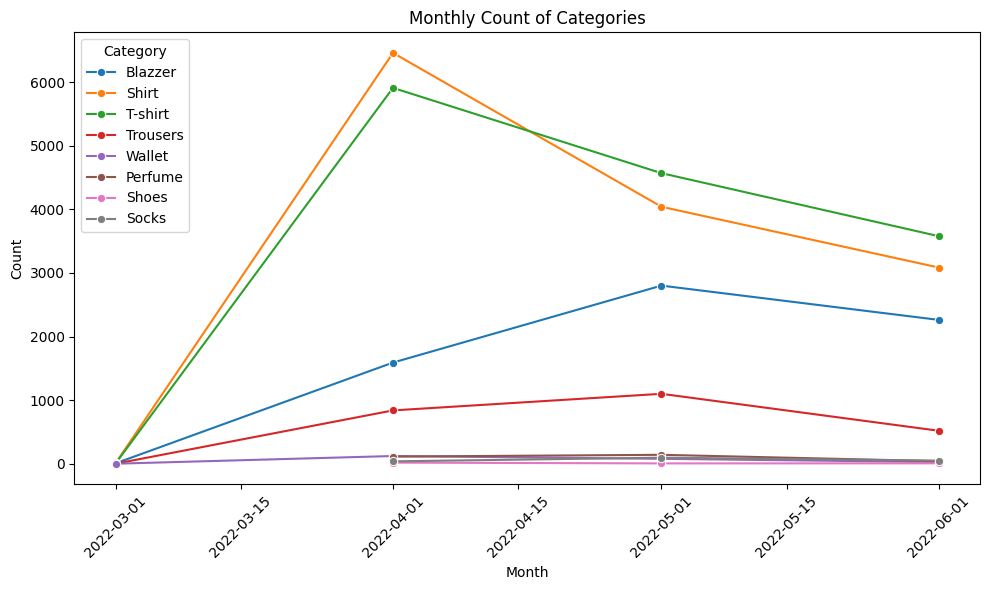

In [34]:
# Create a line plot using Seaborn for analysing relations between Category vs Order Month
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='year_month', y='count', hue='Category', marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count of Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()

* Above chart is build to find the orders quantity in both half of the each month available in the data. For that we have created a new feature by seperating the month from date column.
* Then we have created a line chart among all categories over the time period available in the dataset.
* From the chart, we can see that among all the categories Shirt and T-Shirt being the most ordered item also First half of April month being the most ordered time period.

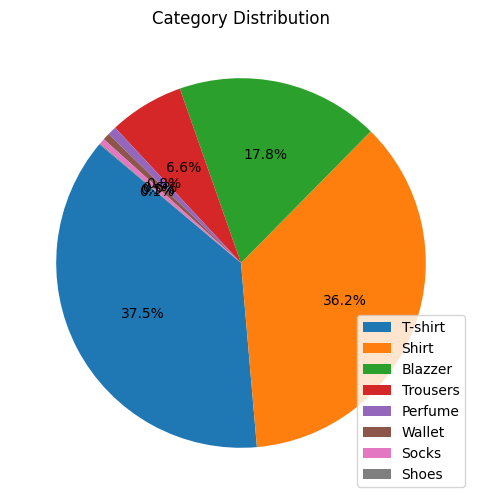

In [35]:
# Get value counts of the 'category' column
value_counts = df['Category'].value_counts()

# Prepare data for pie chart
categories = value_counts.index
counts = value_counts.values

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, autopct='%1.1f%%',startangle=140)
plt.legend(labels=categories)


# Set the title
plt.title('Category Distribution')

# Show the plot
plt.show()

* From the pie chart above, we can gain insight into which categories are the most frequently ordered items in the dataset.
* Out of all eight order categories, Clothing will be in Top three orders considered to other related appearals.
  
  Also, T-shirts is most ordered item among all the available products.

#**Conclusion**

After performing all the above analysis, we have gained some insights out of the data which is useful for constructing the plans to future plans to improve business further.

* Out of all available sizes, customers orders most of the apperals from these three sizes which is M, L and XL. As we know most of the people around us falls into this category only also we have evident insights from the data as the same. So planning on more models, offers and products in these Sizes will help to grow the business further.

* Second and Third charts will be helpful in understanding the geographical distribution of the orders. This information will assist the company in planning improvements in supply efficiency, ensuring they can handle the same volume of orders from the top-performing states. Additionally, the company needs to increase orders from less-contributed states by implementing targeted strategies, such as focusing on regional promotions or creating more localized advertisements to build trust and promote the company.

* Next, we created a line chart showing the trends of all categories over time. The chart reveals the most frequently ordered items along with the highest order volume occurring during the first half of April. This information is useful for focusing on periods with lower order volumes, identifying potential issues during those times, and implementing strategies to improve sales and maintain consistent performance throughout the period.

* From the pie chart, we can analyze the distribution of orders across categories. Businesses can use these insights to maintain the quality of the most frequently ordered items and focus on improving other products to build a customer base for those items. This approach will expand the source of orders and increase revenue across different categories.

From the above points, we can able to grab some business insights which will be helpful to improve the business further.